In [1]:
# This notebook is to visualize the distributions of the different 
# customer profile variables created in the previous notebook

In [2]:
# This includes re-creating the visualizations created in the previous Exercises,
# using the data refined as requested by CFO (excluding transactions from 
# customers who had less than 5 transactions

In [3]:
# Content List
#
# 01. Importing libraries and data
# 02. Re-running previously ran visualizations using the refined data
# 02.01 Create a bar chart: order days of week
# 02.02 Create bar charts: loyalty flags
# 02.03 Create a histogram: price distributions
# 02.04 Create a histogram: order hour of day
# 02.05 Create a scatterplot: Age vs income
# 02.06 Create a line chart: order day of week vs. prices
# 02.07 Create a line chart: order hour vs. prices
# 02.08 Create a line chart: age vs. number of dependents
# 03. Preparing subset dataframes for unique orders and users
# 03.01. Creating a dataframe containing unique orders
# 03.02. Creating a dataframe containing unique users
# 04. Visualizing different customer profiles
# 04.01. Creating a visualization: Age-Income profile distribution
# 04.02. Creating a visualization: Age family status profile distribution
# 04.03. Creating a visualization: Alcohol consumers by age profile distribution
# 04.04. Creating a visualization: User household and pet ownership profile distribution
# 04.05. Creating a visualization: Customer buying power profile distribution
# 04.06. Creating a visualization: Customer preferred shopping time profile distribution

# 01. Importing libraries and data

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Defining the default path for accessing files

path = r'/Users/bladael/Documents/Learning/CareerFoundry_DA/Data Immersion/Achievement 4/06-2023 Instacart Basket Analysis'

In [6]:
# Import data

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [7]:
# Check the shape of the loaded dataframe

ords_prods_all.shape

(30964518, 46)

In [8]:
# Change the pandas display option to view the full list of columns

pd.options.display.max_columns = None

In [9]:
# Check the head of the loaded dataframe

ords_prods_all.head()

,order_id,user_id,order_sequence_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_Days,busiest_period_of_day,max_order,loyalty_flag,total_ord_spend,total_ord_count,avg_ord_spend,spending_flag,median_frequency,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,customer_activity,age_bucket,income_bucket,Age_income_level,Age_fam_status,Age_alcohol_level,Pet_flag,household,Pet_household,buying_power,order_time,user_preferred_shop_time,department
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Normal day,Average orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday morning,Weekday morning shopper,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest day,Average orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday morning,Weekday morning shopper,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest day,Most orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday afternoon,Weekday morning shopper,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest day,Average orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday morning,Weekday morning shopper,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest day,Most orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday afternoon,Weekday morning shopper,beverages


# 02. Re-running previously ran visualizations using the refined data

CP: As per the CFO request, the analyses were re-ran in the previous notebook to remove the users with less than 5 orders from the dataset. Similarly, the visualizations that were created in the previous Exercise will be re-created based on the refined dataset.

In [10]:
# Set the paramaters for the figure exporting to avoid any cutouts

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

## 02.01 Create a bar chart: order days of week

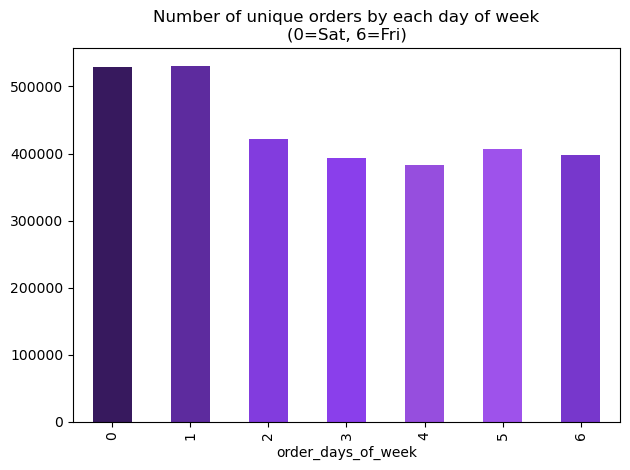

In [11]:
# Change the y-axis display option to display whole numbers

plt.ticklabel_format(style = 'plain')

# Create a bar chart, using the unique count of order ids (avoid duplication of orders due to the itemizations)

bar_orders_dow_ref = ords_prods_all.groupby(['order_days_of_week'])['order_id'].nunique().sort_index().plot.bar(title = 'Number of unique orders by each day of week\n(0=Sat, 6=Fri)', color = ['#37195E','#5D2B9E','#823CDE','#8A3FEB','#964EDE','#9E52EB','#7737CC'])

In [12]:
# Export the bar chart

bar_orders_dow_ref.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations' ,'bar_orders_dow_refined.png'))

In [13]:
# Delete the chart to save memory

del bar_orders_dow_ref

## 02.02 Create bar charts: loyalty flags

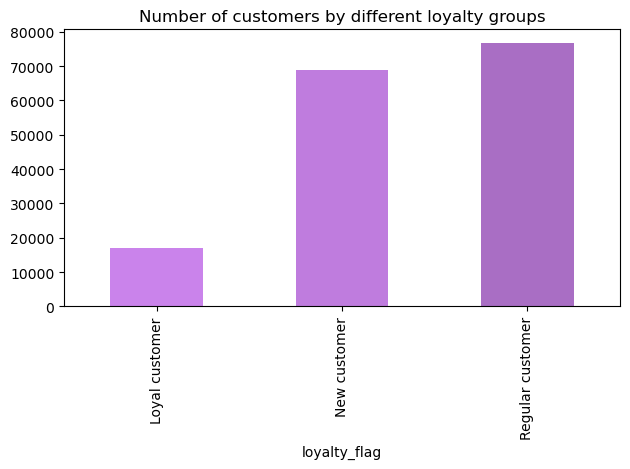

In [14]:
# Change the y-axis display option to display whole numbers

plt.ticklabel_format(style = 'plain')

# Create a bar chart based on unique user_ids by loyalty group

bar_loyalty_user_ref = ords_prods_all.groupby(['loyalty_flag'])['user_id'].nunique(dropna = False).plot.bar(title = 'Number of customers by different loyalty groups', color = ['#CA83EB','#BF7CDE','#A96EC4'])

In [15]:
# Export the bar chart

bar_loyalty_user_ref.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_user_refined.png'))

In [16]:
# Delete the chart to save memory

del bar_loyalty_user_ref

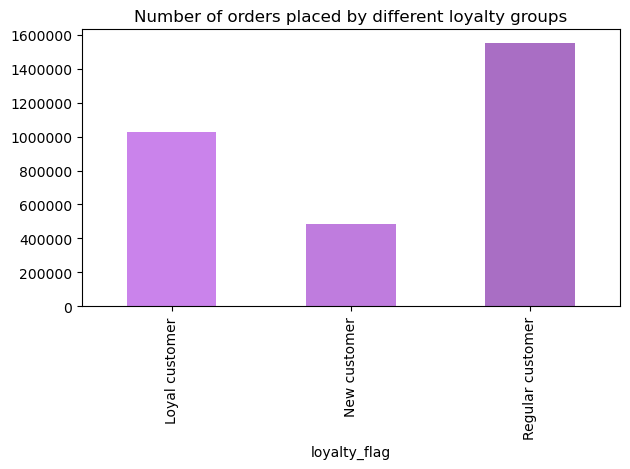

In [17]:
# Thought it would be interesting to see the same data, but by the number of orders placed by each group for comparison 

# Change the y-axis display option to display whole numbers

plt.ticklabel_format(style = 'plain')

# Create a bar chart based on unique user_ids by loyalty group

bar_loyalty_ord_ref = ords_prods_all.groupby(['loyalty_flag'])['order_id'].nunique(dropna = False).plot.bar(title = 'Number of orders placed by different loyalty groups', color = ['#CA83EB','#BF7CDE','#A96EC4'])

In [18]:
# Export the bar chart

bar_loyalty_ord_ref.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_order_refined.png'))

In [19]:
# Delete the chart to save memory

del bar_loyalty_ord_ref

## 02.03 Create a histogram: price distributions

In [20]:
# Check desriptive stats over data

ords_prods_all['prices'].describe()

count    3.095964e+07
mean     7.790589e+00
std      4.240595e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [21]:
# Check descriptive stats over data

ords_prods_all['prices'].mean()

7.790588753919999

In [22]:
# Check descriptive stats over data

ords_prods_all['prices'].median()

7.4

In [23]:
# Check descriptive stats over data

ords_prods_all['prices'].max()

25.0

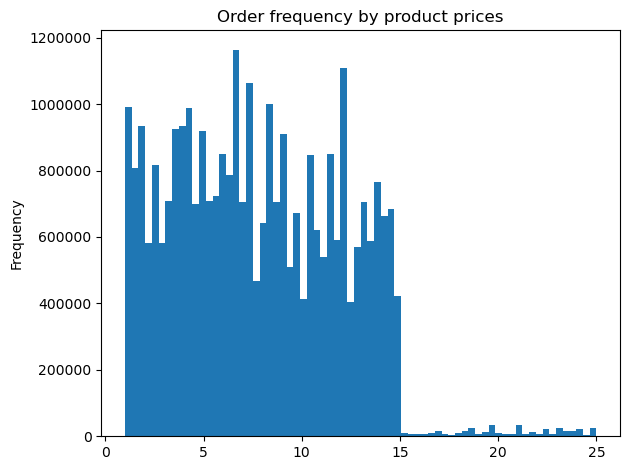

In [24]:
# Change the y-axis display option to display whole numbers

plt.ticklabel_format(style = 'plain')

# Create a histogram the bin size to 70

hist_prices_ref = ords_prods_all['prices'].plot.hist(title = 'Order frequency by product prices', bins = 70)

In [25]:
# Export the histogram

hist_prices_ref.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_refined.png'))

## 02.04 Create a histogram: order hour of day

In [26]:
# Check the value counts of the data to be charted based on unique order ids

ords_prods_all.groupby(['order_hour_of_day'])['order_id'].nunique().sort_index()

order_hour_of_day
0      20291
1      10975
2       6684
3       4850
4       4909
5       8554
6      27753
7      83633
8     161957
9     233810
10    260111
11    255569
12    243654
13    248712
14    252847
15    252989
16    243327
17    203000
18    161929
19    124715
20     93341
21     70100
22     54834
23     35817
Name: order_id, dtype: int64

In [27]:
# For the purpose of creating a histogram with unique order counts, create a subset dataframe
# The subset will only contain order_id and order_hour_of_day

df_hist_ords_hour_ref = ords_prods_all[['order_id','order_hour_of_day']]

In [28]:
# Check the shape of the subset

df_hist_ords_hour_ref.shape

(30964518, 2)

In [29]:
# Check duplicates from the subset

df_hist_ords_hour_ref.duplicated().value_counts(dropna = False)

True     27900157
False     3064361
dtype: int64

In [30]:
# Remove the duplicates from the subset to have each row to contain unique order_id and associated hour

df_hist_ords_hour_ref = df_hist_ords_hour_ref.drop_duplicates()

In [31]:
# Check the shape of the cleaned subset

df_hist_ords_hour_ref.shape

(3064361, 2)

In [32]:
# Check against the count of unique order ids

ords_prods_all['order_id'].nunique()

3064361

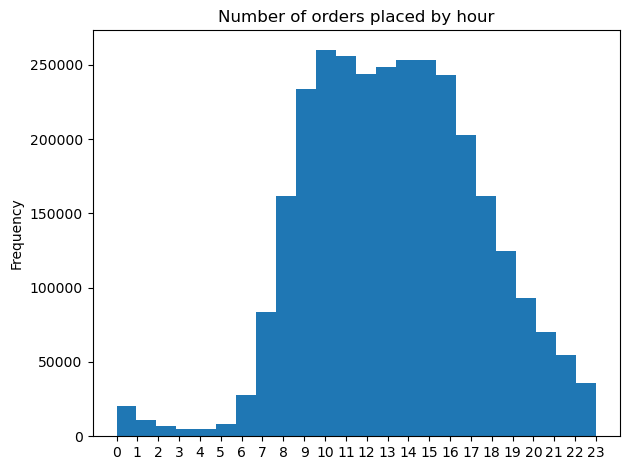

In [33]:
# Subset data verified. Use it to create a histogram
# Change the Y-axis format as plain

plt.ticklabel_format(style = 'plain')

# Adjust x axis tickmark format

plt.xticks(range(24))

# Create a histogram, and define it as an object

hist_order_hour_ref = df_hist_ords_hour_ref['order_hour_of_day'].sort_index().plot.hist(title = 'Number of orders placed by hour', bins = 24)

In [34]:
# Export the histogram

hist_order_hour_ref.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_refined.png'))

In [35]:
# Delete the subset dataframe and chart to save memory

del df_hist_ords_hour_ref
del hist_order_hour_ref

## 02.05 Create a scatterplot: Age vs income

In [36]:
# Create a subset dataframe for each row to have unique customer information

df_custs_ref = (ords_prods_all[['user_id', 'Age', 'income']]).drop_duplicates()

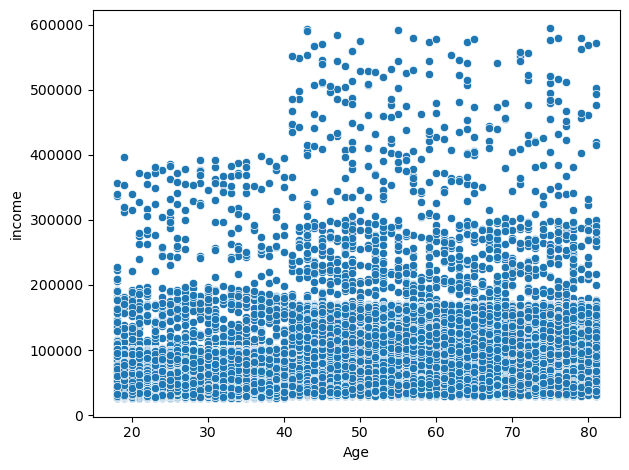

In [37]:
# Create a scatter plot using the subset

plt.ticklabel_format(style = 'plain')
scat_age_income_ref = sns.scatterplot(x = 'Age', y = 'income', data = df_custs_ref)

CP: Based on the scatterplot, most of the Instacart customers have the income between $0 to $200K. However, it appears that older customers, especially 40 and above, seemed to have more spending power compare to the younger customers as there are many customers who make between $200K and $300K compared to the younger customers. Additionally, there are older customers who even have incomes between $400K and $600K while such income levels do not appear for the customers who are younger than 40.

In [38]:
# Export the scatterplot 

scat_age_income_ref.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','scat_age_income_refined.png'))

In [39]:
# Deletet the subset dataframe and chart to save memory

del df_custs_ref
del scat_age_income_ref

## 02.06 Create a line chart: order day of week vs. prices

In [40]:
# Unlike Exercise 4.9 where samples were selected,
# the entire population will be plotted for accuracy

# Created a trimmed dataframe to only have the columns need for charting

df_day_price = ords_prods_all[['order_days_of_week','prices']]

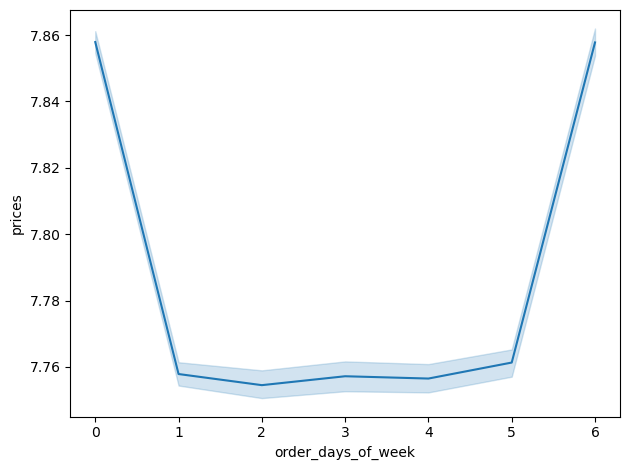

In [41]:
# Create a line chart using the trimmed dataframe

line_day_price = sns.lineplot(data = df_day_price, x = 'order_days_of_week', y = 'prices')

In [42]:
# Export the chart

line_day_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_dow_prices_refined.png'))

In [43]:
# Delete the chart to save memory

del df_day_price
del line_day_price

## 02.07 Create a line chart: order hour vs. prices

In [44]:
# Unlike Exercise 4.9 where samples were selected,
# the entire population will be plotted for accuracy

# Created a trimmed dataframe to only have the columns need for charting

df_hour_price = ords_prods_all[['order_hour_of_day','prices']]

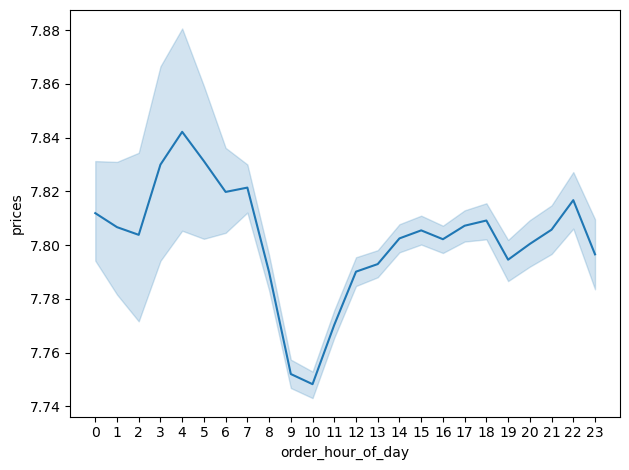

In [45]:
# Adjusting the x-axis tickmark format
plt.xticks(range(24))

# Create a line chart using the trimmed dataframe
line_hour_price = sns.lineplot(data = df_hour_price, x = 'order_hour_of_day', y = 'prices')

In [46]:
# Export the chart

line_hour_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_prices_refined.png'))

In [47]:
# Delete the chart to save memory

del df_hour_price
del line_hour_price

## 02.08 Create a line chart: age vs. number of dependents

In [48]:
# Create a subset dataframe for each row to have unique customer information

df_custs_ref_2 = (ords_prods_all[['user_id', 'Age', 'n_dependants']]).drop_duplicates()

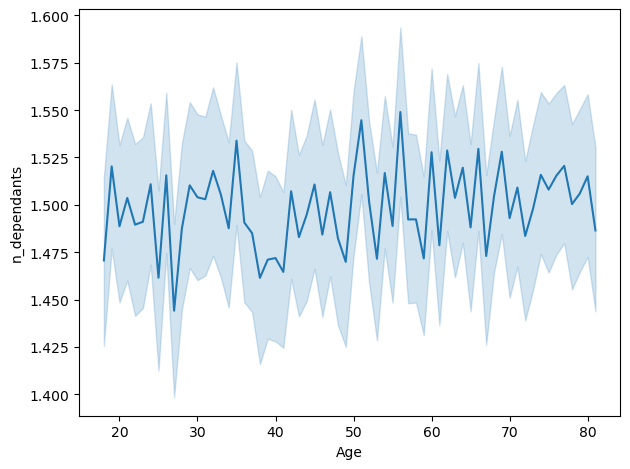

In [49]:
# Create a line chart using the subset

line_age_dependants_ref = sns.lineplot(data = df_custs_ref_2, x = 'Age', y = 'n_dependants')

CP: From the line chart above, it seems to be that there is no clear trend between age and number of dependants. Recommend exploring the relationships between other variables to assist targetted marketing campaigns.

In [50]:
# Export the line chart

line_age_dependants_ref.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants_refined.png'))

In [51]:
# Delete the chart to save memory

del df_custs_ref_2 
del line_age_dependants_ref

# 03. Preparing subset dataframes for unique orders and users

CP: Given that the current master dataframe contains itemized details for each order where the same order number may be repeated more than once in the dataframe. For certain type of analyses, it may be more beneficial to have a dataset only containing the list of unique orders or unique users. Thus, creating a separate dataframe only containing the unique list of orders, without the product, department, price details and another subset dataframe for unique users.

In [52]:
# Create a duplicate dataframe for unique orders and unique users to preserve the master dataframe

ords_unique = ords_prods_all
users_unique = ords_prods_all

In [53]:
# Check the shape of the duplicate dataframe

ords_unique.shape

(30964518, 46)

In [54]:
# Check the shape of the duplicate dataframe

users_unique.shape

(30964518, 46)

## 03.01. Creating a dataframe containing unique orders

In [55]:
# Check the dataframe head

ords_unique.head()

,order_id,user_id,order_sequence_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_Days,busiest_period_of_day,max_order,loyalty_flag,total_ord_spend,total_ord_count,avg_ord_spend,spending_flag,median_frequency,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,customer_activity,age_bucket,income_bucket,Age_income_level,Age_fam_status,Age_alcohol_level,Pet_flag,household,Pet_household,buying_power,order_time,user_preferred_shop_time,department
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Normal day,Average orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday morning,Weekday morning shopper,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest day,Average orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday morning,Weekday morning shopper,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest day,Most orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday afternoon,Weekday morning shopper,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest day,Average orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday morning,Weekday morning shopper,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest day,Most orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday afternoon,Weekday morning shopper,beverages


In [56]:
# Deleting the columns containing the itemized order details, then remove the duplicate rows

ords_unique = ords_unique.drop(columns = ['product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc']).drop_duplicates()

In [57]:
# Check the shape of the subset of unique orders

ords_unique.shape

(14520146, 38)

In [58]:
# Compare the count of unique order ids from the master dataframe to see whether it matches the total rows above

ords_prods_all['order_id'].nunique(dropna = False)

3064361

## 03.02. Creating a dataframe containing unique users

In [59]:
# Check the dataframe head

users_unique.head()

,order_id,user_id,order_sequence_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_Days,busiest_period_of_day,max_order,loyalty_flag,total_ord_spend,total_ord_count,avg_ord_spend,spending_flag,median_frequency,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,customer_activity,age_bucket,income_bucket,Age_income_level,Age_fam_status,Age_alcohol_level,Pet_flag,household,Pet_household,buying_power,order_time,user_preferred_shop_time,department
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Normal day,Average orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday morning,Weekday morning shopper,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest day,Average orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday morning,Weekday morning shopper,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest day,Most orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday afternoon,Weekday morning shopper,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest day,Average orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday morning,Weekday morning shopper,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest day,Most orders,10,New customer,375.7,10,37.57,High spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular-activity,Middle-aged,Low income,Middle-aged Low income,Middle-aged married,Middle-aged Non-alcohol consumer,Non-pet owner,Multi-member family,Multi-member family Non-pet owner,Dual income with multiple kids,Weekday afternoon,Weekday morning shopper,beverages


In [60]:
# Deleting the columns that are not related to customer-level profiles, then remove the duplicate rows

users_unique = users_unique.drop(columns = ['order_id', 'order_sequence_number', 'order_days_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day', 'Busiest_Days', 'busiest_period_of_day', 'order_time']).drop_duplicates()

In [61]:
# Check the shape of the subset of unique users

users_unique.shape

(1881617, 29)

In [62]:
# Compare the count of unique user ids from the master dataframe to see whether it matches the total rows above

ords_prods_all['user_id'].nunique(dropna = False)

162627

# 04. Visualizing different customer profiles

CP: This section is to visualize the distributions of the different customer profile variables created in the previous notebook

In [63]:
# Change the figure layout for a better chart exporting

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

## 04.01. Creating a visualization: Age-Income profile distribution

In [64]:
# Check the varibales for the column to visualize

users_unique['Age_income_level'].value_counts(dropna = False)

Middle-aged Middle income    707317
Young adult Middle income    273806
Senior Middle income         260860
Middle-aged High income      200198
Middle-aged Low income       177417
Young adult Low income       105438
Senior High income           103685
Senior Low income             49689
Young adult High income        3207
Name: Age_income_level, dtype: int64

<Axes: title={'center': 'Number of customers by age and income-level'}>

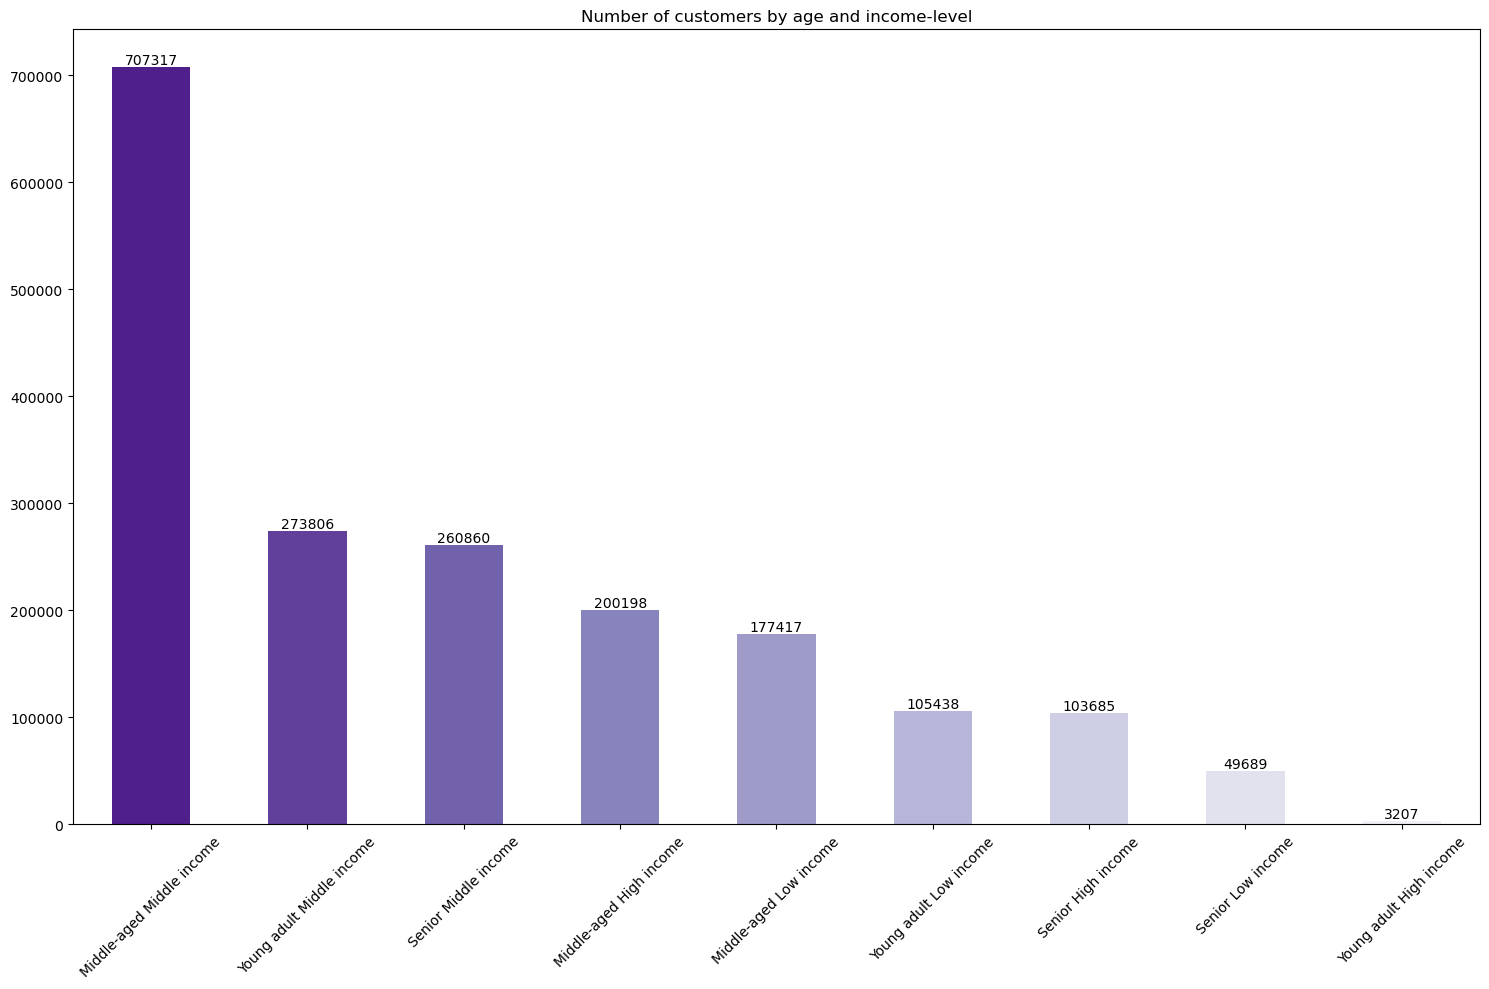

In [65]:
# More than 5 categories to visualize
# Create a bar chart based on the profiling variable

# Format the y-axis label to display whole numbers
plt.ticklabel_format(style = 'plain')

# Create a bar chart
bar_age_income = users_unique['Age_income_level'].value_counts(dropna = False).plot.bar(title = 'Number of customers by age and income-level', legend = False, color = sns.color_palette('Purples_r', 9), figsize = (15,10), rot = 45)

# Add value labels to each bar
bar_age_income.bar_label(bar_age_income.containers[0], label_type='edge')

# Display the bar chart
bar_age_income

In [66]:
# Export the chart

bar_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_income.png'))

## 04.02. Creating a visualization: Age family status profile distribution

In [67]:
# Check the varibales for the column to visualize

users_unique['Age_fam_status'].value_counts(dropna = False)

Middle-aged married                             813447
Senior married                                  312272
Middle-aged single                              213582
Young adult married                             197598
Senior divorced/widowed                         101962
Young adult single                               96298
Young adult living with parents and siblings     88555
Middle-aged divorced/widowed                     57903
Name: Age_fam_status, dtype: int64

<Axes: title={'center': 'Number of customers by age and family status'}>

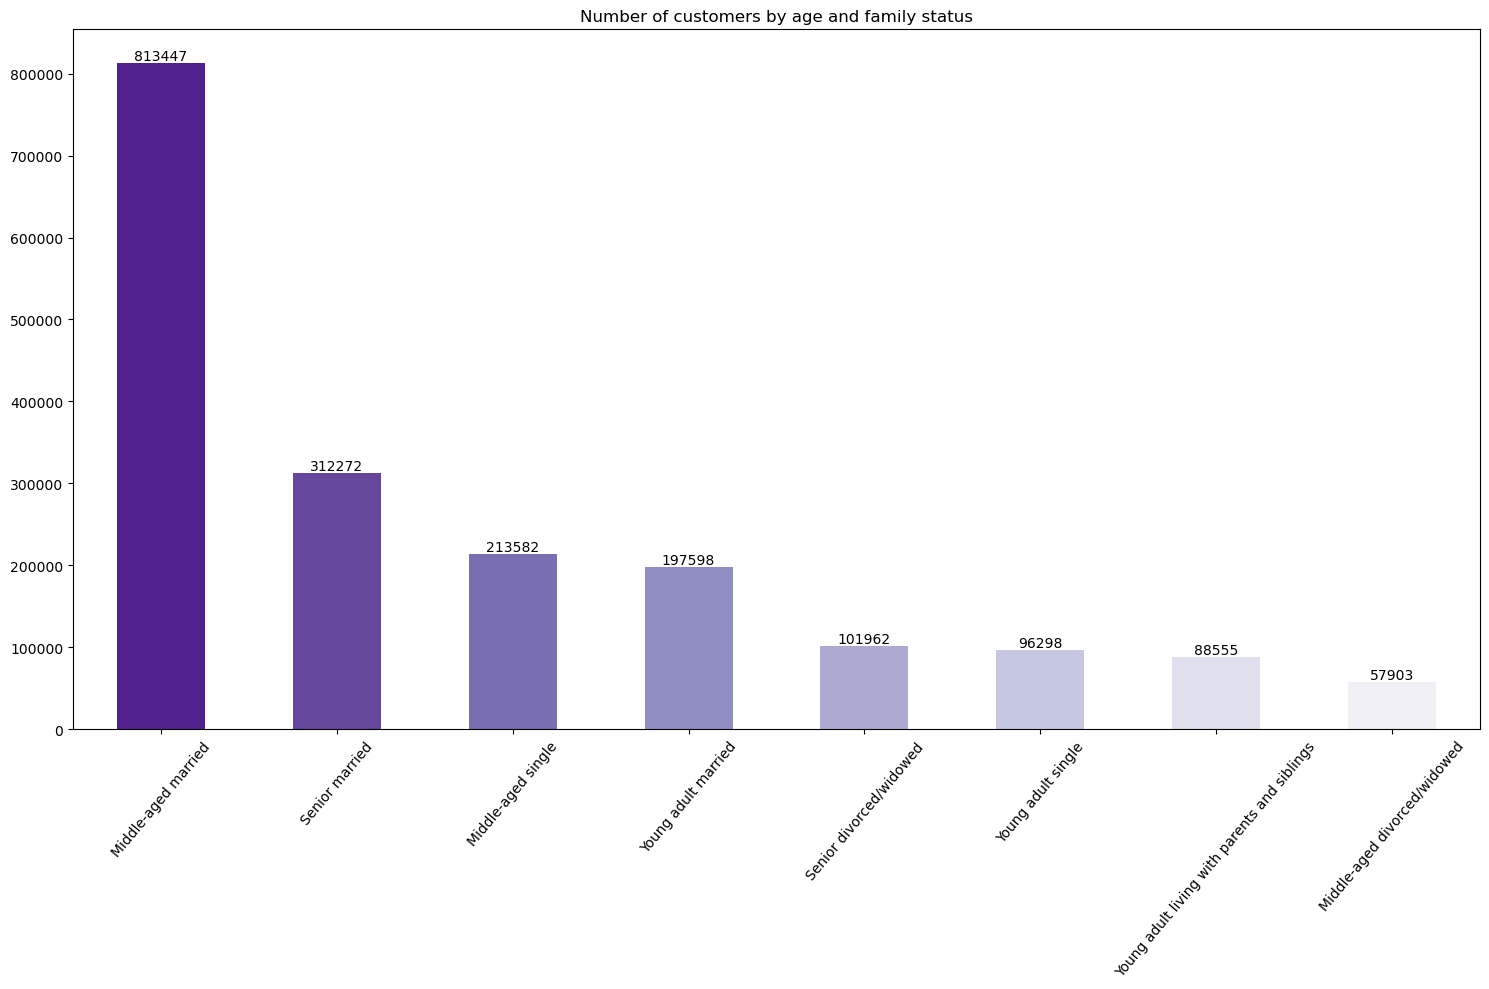

In [68]:
# More than 5 categories to visualize
# Create a bar chart based on the profiling variable

# Format the y-axis label to display whole numbers
plt.ticklabel_format(style = 'plain')

# Create a bar chart
bar_age_fam = users_unique['Age_fam_status'].value_counts(dropna = False).plot.bar(title = 'Number of customers by age and family status', legend = False, color = sns.color_palette('Purples_r', 8), figsize = (15,10), rot = 50)

# Add value labels to each bar
bar_age_fam.bar_label(bar_age_fam.containers[0], label_type='edge')

# Display the bar chart
bar_age_fam

In [69]:
# Export the chart

bar_age_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_family_status.png'))

## 04.03. Creating a visualization: Alcohol consumers by age profile distribution

In [70]:
# Check the varibales for the column to visualize

users_unique['Age_alcohol_level'].value_counts(dropna = False)

Middle-aged Non-alcohol consumer    987723
Senior Non-alcohol consumer         377692
Young adult Non-alcohol consumer    348413
Middle-aged Alcohol consumer         97209
Senior Alcohol consumer              36542
Young adult Alcohol consumer         34038
Name: Age_alcohol_level, dtype: int64

<Axes: title={'center': 'Number of customers by age and alcohol consumption'}>

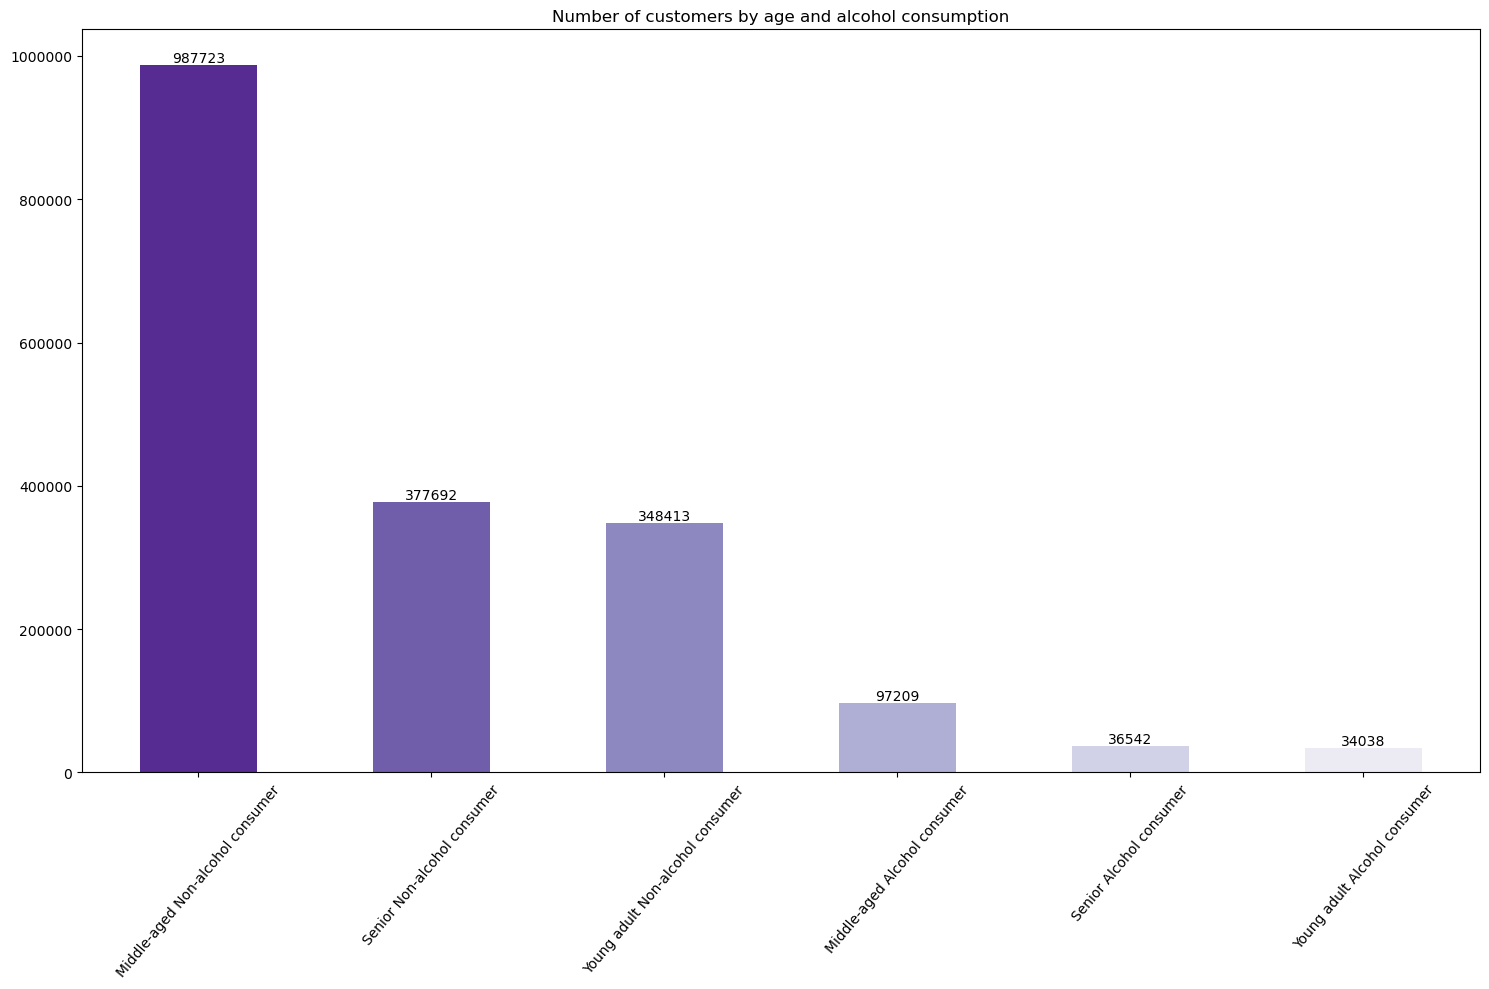

In [71]:
# More than 5 categories to visualize
# Create a bar chart based on the profiling variable

# Format the y-axis label to display whole numbers
plt.ticklabel_format(style = 'plain')

# Create a bar chart
bar_age_alcohol = users_unique['Age_alcohol_level'].value_counts(dropna = False).plot.bar(title = 'Number of customers by age and alcohol consumption', legend = False, color = sns.color_palette('Purples_r', 6), figsize = (15,10), rot = 50)

# Add value labels to each bar
bar_age_alcohol.bar_label(bar_age_alcohol.containers[0], label_type='edge')

# Display the bar chart
bar_age_alcohol

In [72]:
# Export the chart

bar_age_alcohol.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_alcohol.png'))

## 04.04. Creating a visualization: User household and pet ownership profile distribution

In [73]:
# Check the varibales for the column to visualize

users_unique['Pet_household'].value_counts(dropna = False)

Multi-member family Non-pet owner     1268557
Single-member family Non-pet owner     422621
Multi-member family Pet owner          143315
Single-member family Pet owner          47124
Name: Pet_household, dtype: int64

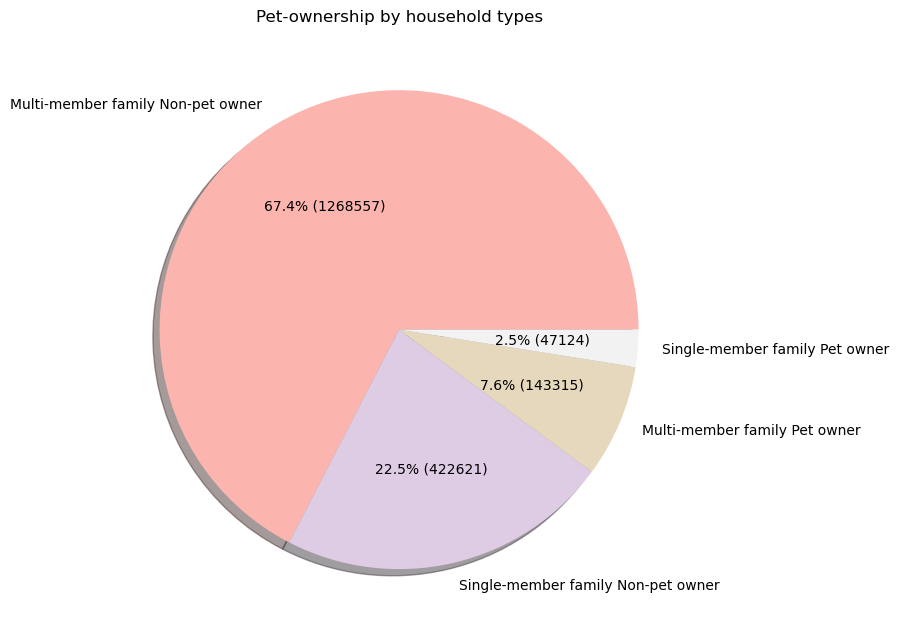

In [74]:
# Less than 5 categories to visualize
# Create a pie chart based on the profiling variable

# Define a custom label formats for the pie chart to display both % and values
def pie_label(x):
    total = len(users_unique['Pet_household'])
    return '{:.1f}% ({:.0f})'.format(x, total*x/100)

# Create a pie chart
pie_pet_household = users_unique['Pet_household'].value_counts(dropna = False).plot.pie(title = "Pet-ownership by household types", legend = False, autopct=pie_label, colormap = 'Pastel1', shadow = True, figsize = (9,9)).set_ylabel('')

In [75]:
# Export the chart

pie_pet_household.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_pet_household.png'))

## 04.05. Creating a visualization: Customer buying power profile distribution

In [76]:
# Check the varibales for the column to visualize

users_unique['buying_power'].value_counts(dropna = False)

Dual income with multiple kids    882336
Single income with no kids        469745
Dual income with single kid       440981
Dependant of someone               88555
Name: buying_power, dtype: int64

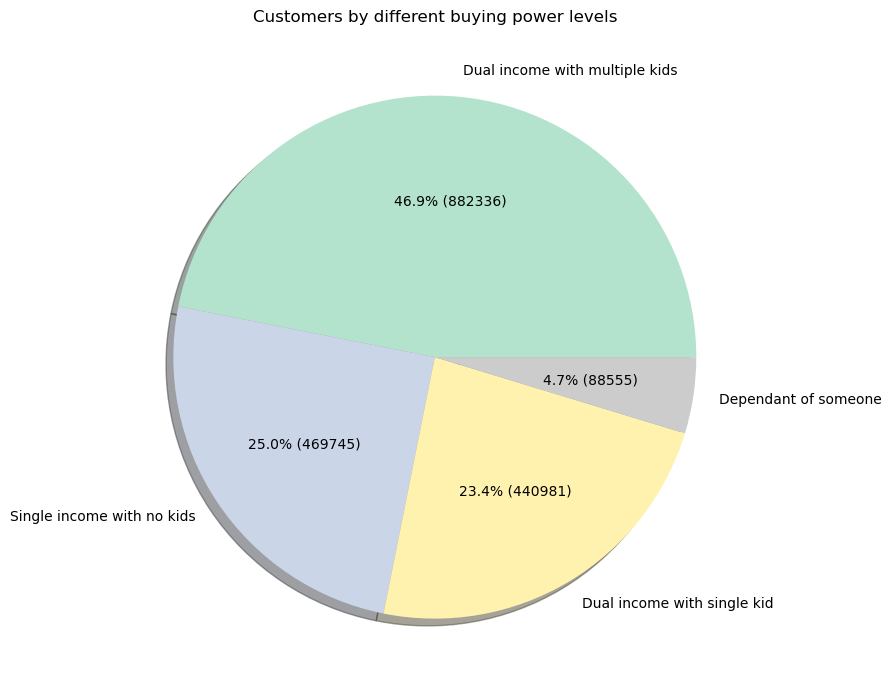

In [77]:
# Less than 5 categories to visualize
# Create a pie chart based on the profiling variable

# Define a custom label formats for the pie chart to display both % and values
def pie_label(x):
    total = len(users_unique['buying_power'])
    return '{:.1f}% ({:.0f})'.format(x, total*x/100)

# Create a pie chart
pie_buying_power = users_unique['buying_power'].value_counts(dropna = False).plot.pie(title = "Customers by different buying power levels", legend = False, autopct=pie_label, colormap = 'Pastel2', shadow = True, figsize = (9,9)).set_ylabel('')

In [78]:
# Export the chart

pie_buying_power.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_buying_power.png'))

## 04.06. Creating a visualization: Customer preferred shopping time profile distribution

In [79]:
# Check the varibales for the column to visualize

users_unique['user_preferred_shop_time'].value_counts(dropna = False)

Weekday afternoon shopper    700497
Weekday evening shopper      315670
Weekday morning shopper      288900
Weekend afternoon shopper    261990
Weekend morning shopper      100955
Weekday night shopper         94495
Weekend evening shopper       92305
Weekend night shopper         26805
Name: user_preferred_shop_time, dtype: int64

<Axes: title={'center': 'Distribution of customers preferred shopping days and hours'}>

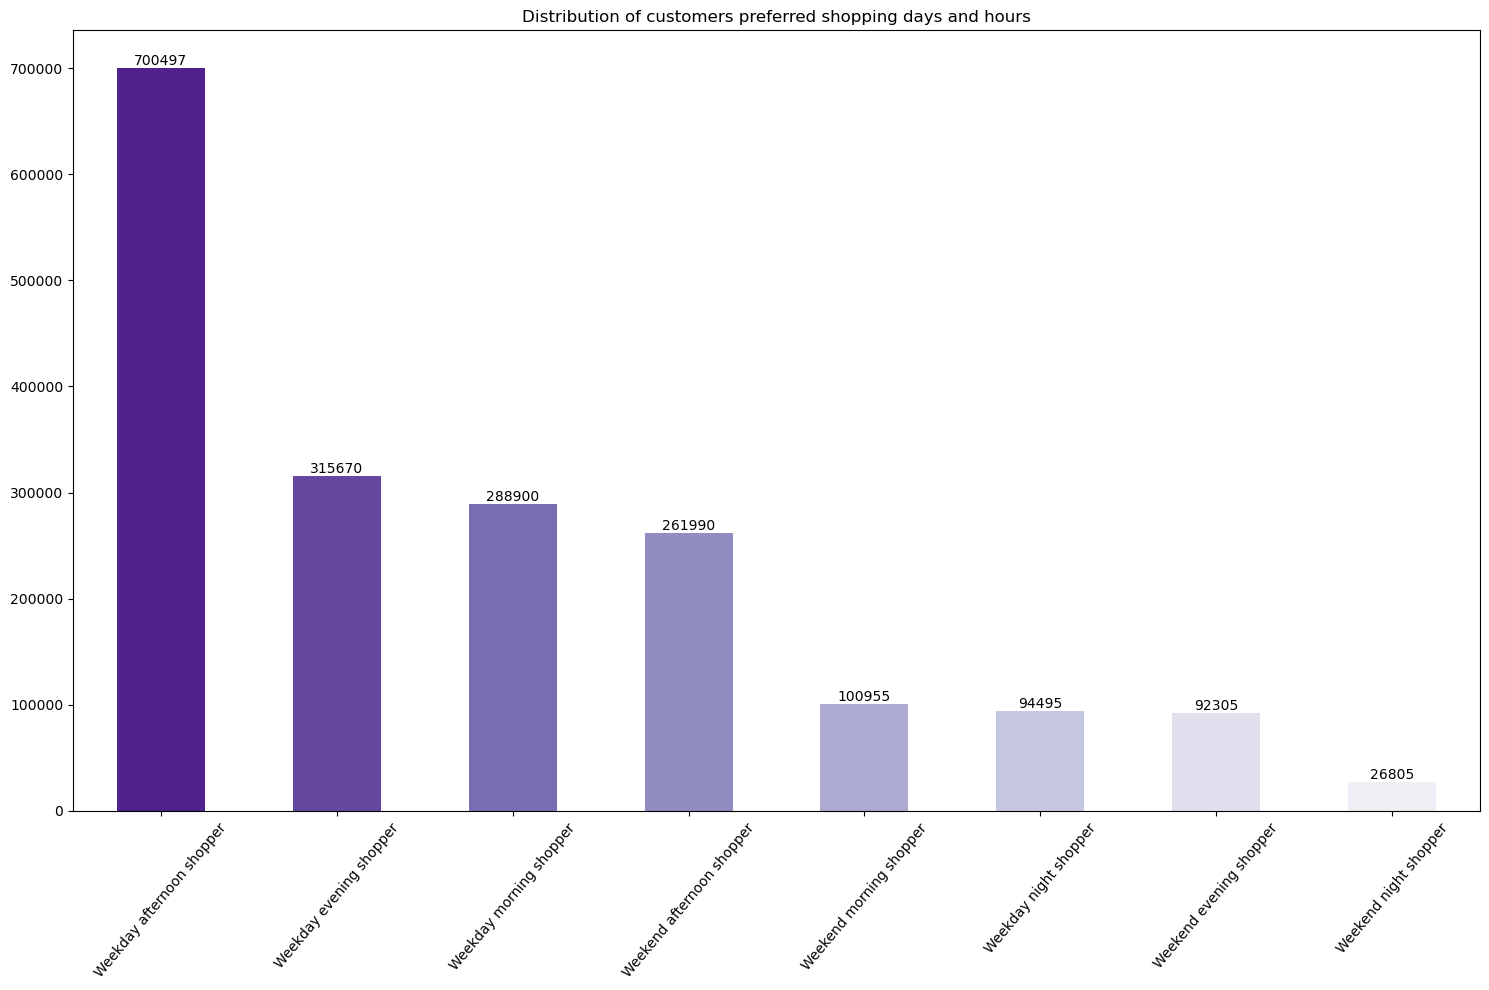

In [80]:
# More than 5 categories to visualize
# Create a bar chart based on the profiling variable

# Format the y-axis label to display whole numbers
plt.ticklabel_format(style = 'plain')

# Create a bar chart
bar_preferred_time = users_unique['user_preferred_shop_time'].value_counts(dropna = False).plot.bar(title = 'Distribution of customers preferred shopping days and hours', legend = False, color = sns.color_palette('Purples_r', 8), figsize = (15,10), rot = 50)

# Add value labels to each bar
bar_preferred_time.bar_label(bar_preferred_time.containers[0], label_type='edge')

# Display the bar chart
bar_preferred_time

In [81]:
# Export the chart

bar_preferred_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_preferred_time.png'))